In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

import re

# Importing sklearn.metrics libraries
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Libraries required for hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
data = pd.read_csv("/content/amazon_reviews (1).txt", delimiter = "\t")

In [ ]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
data.shape

(21000, 9)

Data **Cleaning**

In [ ]:
#Dropping unnecessary columns
data.drop(['DOC_ID','PRODUCT_ID'], axis=1, inplace=True)

In [ ]:
data.LABEL.value_counts()

LABEL
__label1__    10500
__label2__    10500
Name: count, dtype: int64

In [ ]:
# Renaming the Label into numeric
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [ ]:
data.head(1)

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,4,N,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABEL              21000 non-null  object
 1   RATING             21000 non-null  int64 
 2   VERIFIED_PURCHASE  21000 non-null  object
 3   PRODUCT_CATEGORY   21000 non-null  object
 4   PRODUCT_TITLE      21000 non-null  object
 5   REVIEW_TITLE       21000 non-null  object
 6   REVIEW_TEXT        21000 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
data['LABEL'] = data['LABEL'].astype(int)

# EDA
Univariate **Analysis**

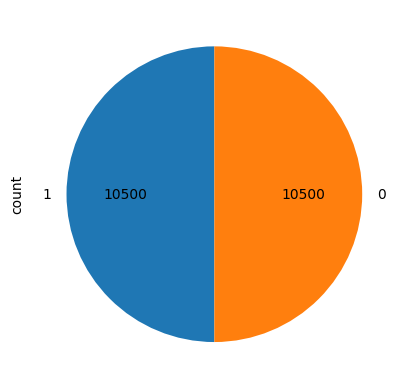

In [ ]:
values=data['LABEL'].value_counts()
data.LABEL.value_counts().plot(kind='pie', startangle = 90,autopct= lambda x: '{:.0f}'.format(x*values.sum()/100));

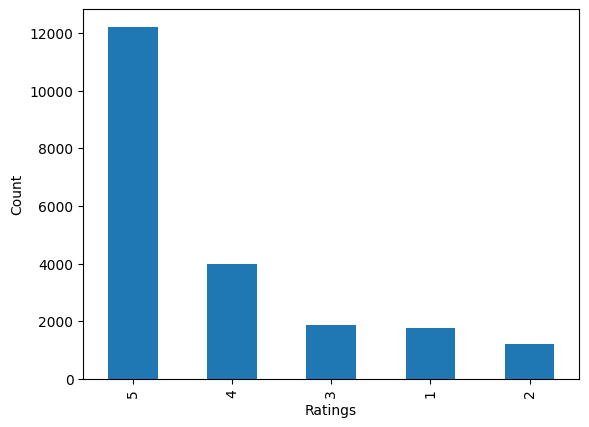

In [ ]:
data.RATING.value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Count');

In [ ]:
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])

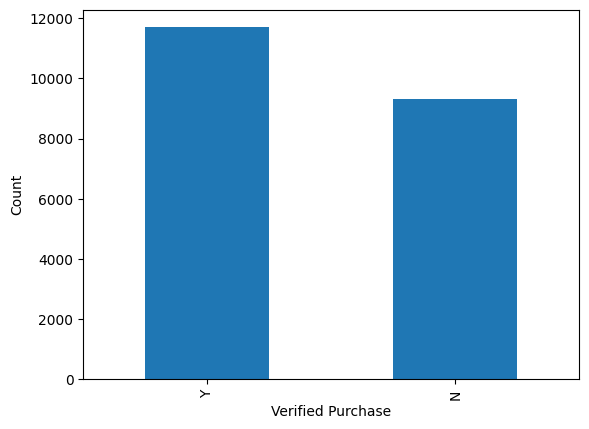

In [ ]:
data['VERIFIED_PURCHASE'].value_counts().plot(kind='bar',)
plt.xlabel('Verified Purchase')
plt.ylabel('Count');

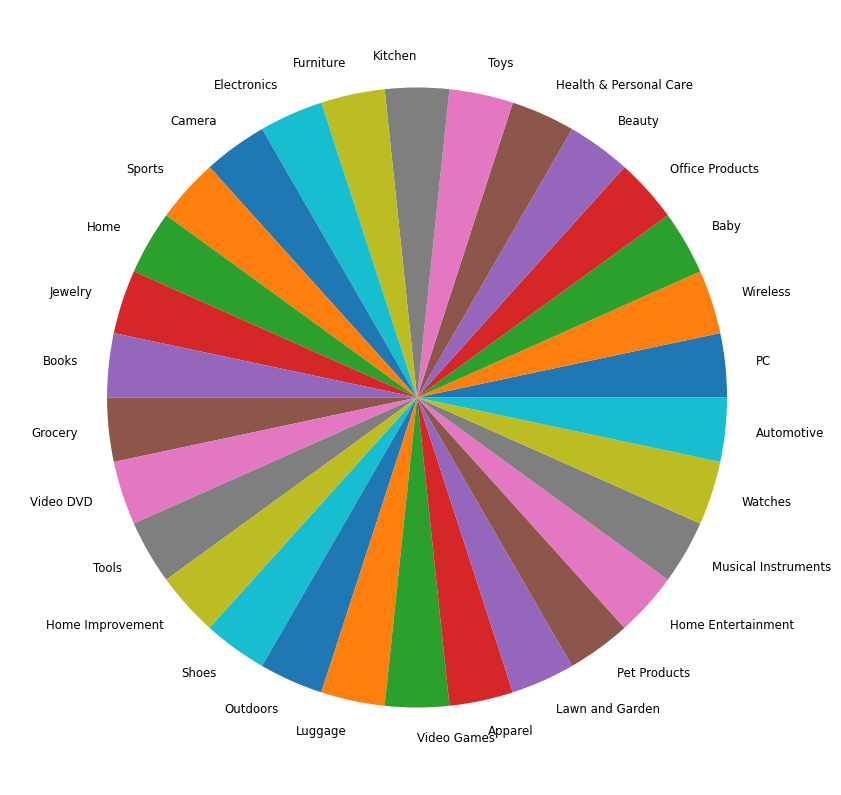

In [ ]:
plt.figure(figsize=(10,15))
data.PRODUCT_CATEGORY.value_counts().plot(kind = 'pie', fontsize = 8.5)
plt.ylabel(' ');

**INFERENCE**

All the categories have equal number of reviews

Bi-variate analysis

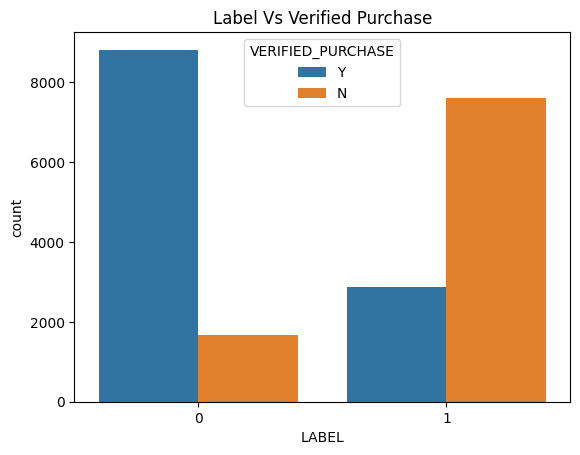

In [ ]:
sns.countplot(x='LABEL', hue='VERIFIED_PURCHASE', data=data)
plt.title('Label Vs Verified Purchase');

**INFERENCE**

Most fake reviews are from customers who have not purchased the product on the website

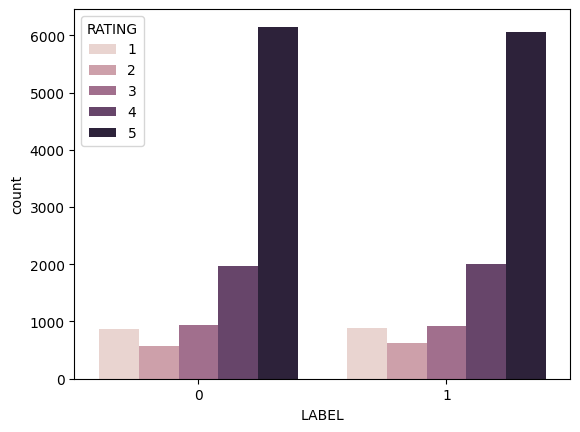

In [ ]:
sns.countplot(x='LABEL', hue='RATING', data=data);

**INFERENCE**

1. Ratings are divided equally for both the labels
2. Both fake and real reviews have high/positive ratings



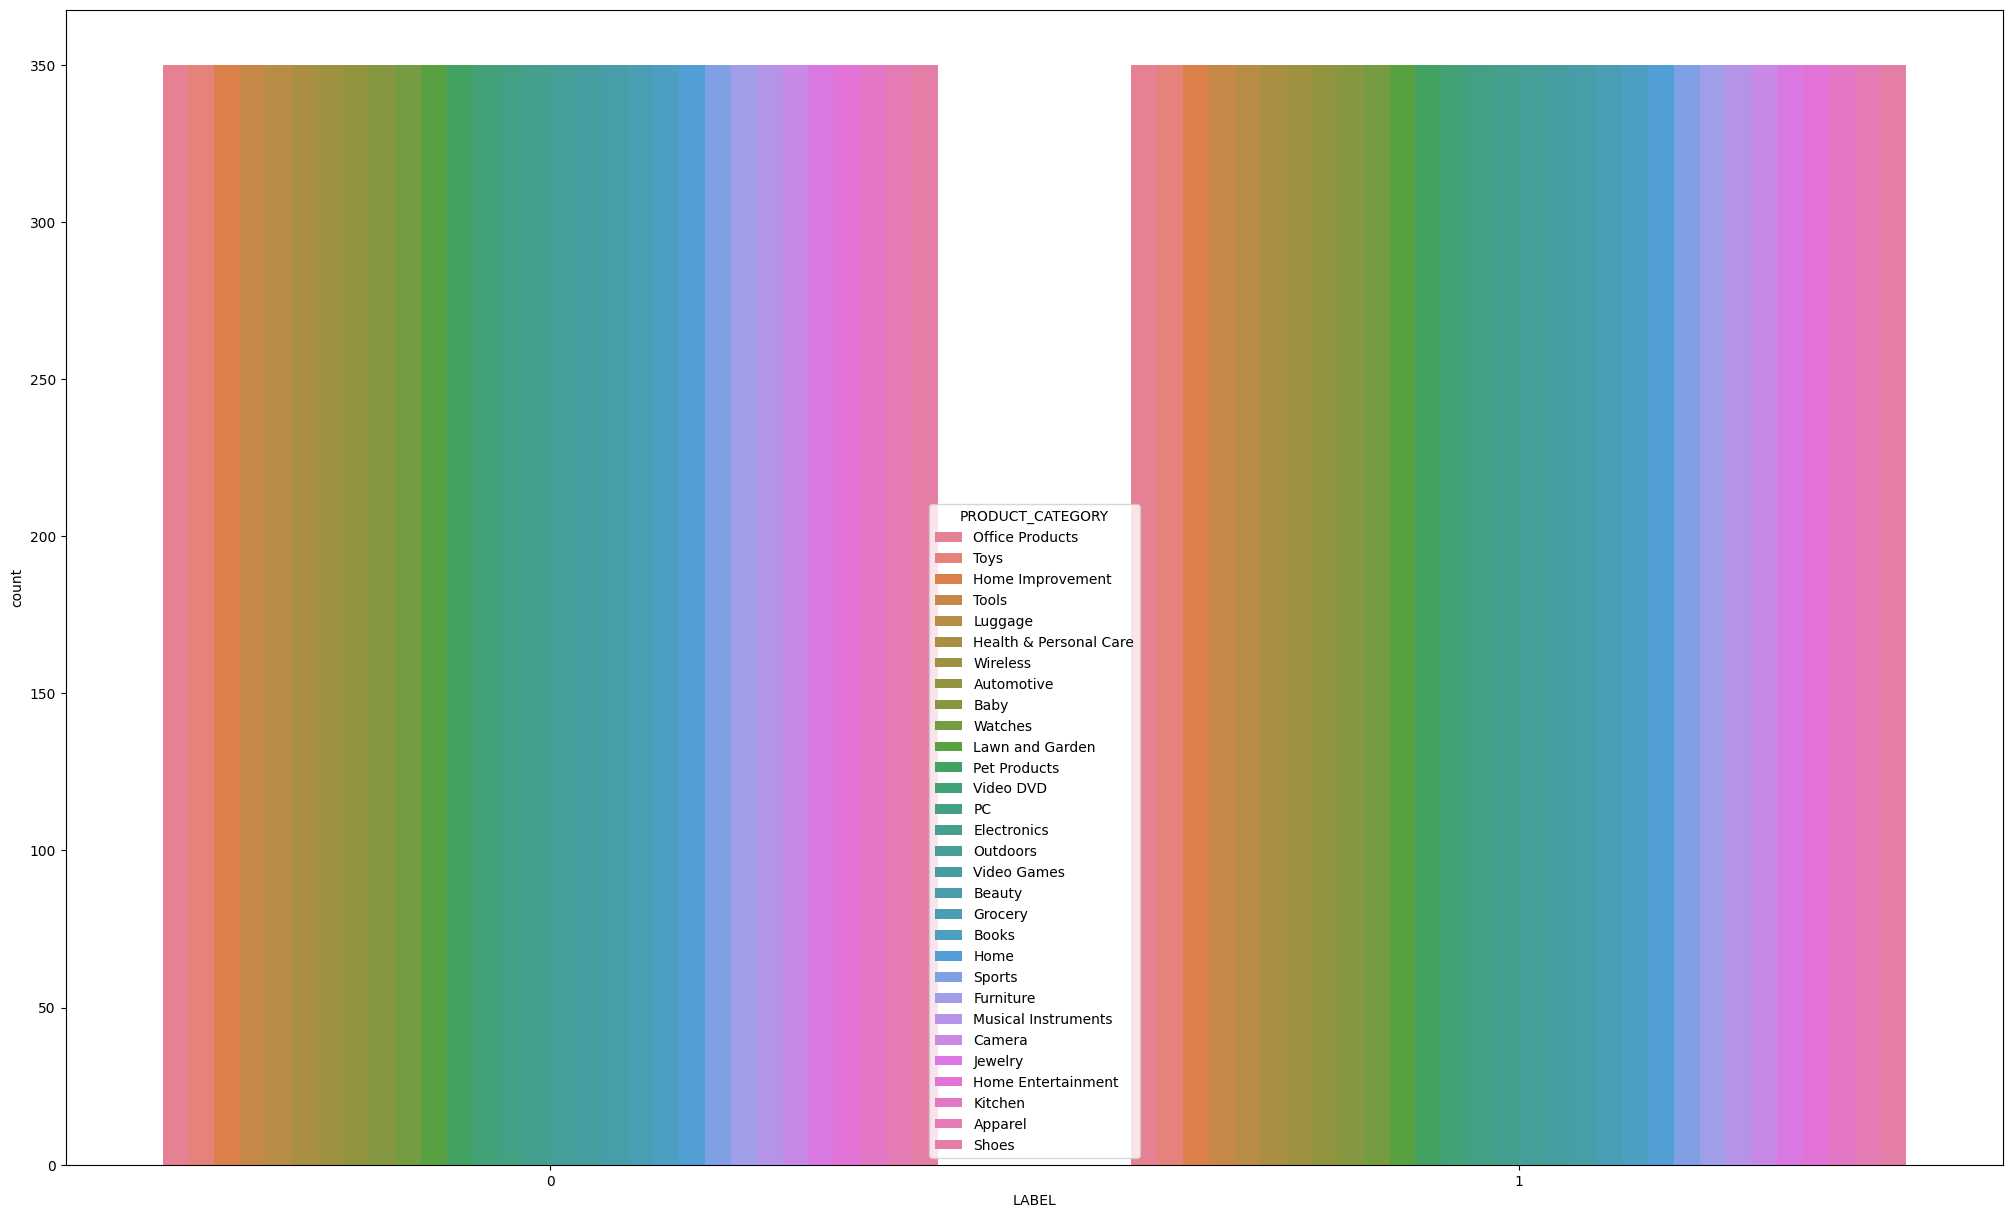

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(x='LABEL', hue='PRODUCT_CATEGORY', data=data);

**INFERENCE**

Equal number of product reviews for both the labels

Analysis

1. Visualising the sentiment of both fake and real reviews using TextBlob

In [ ]:
from textblob import TextBlob
data['sentiment_score'] = data['REVIEW_TEXT'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
def label_column(x):
    if x == 0:
        return 'Neutral'
    elif x < 0:
        return 'Negative'
    else:
        return 'Positive'

In [ ]:
data['sentiment_label']=data['sentiment_score'].apply(lambda x:label_column(x))
data.head()

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,sentiment_score,sentiment_label
0,1,4,N,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",-0.300000,Negative
1,1,4,Y,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,0.219226,Positive
2,1,3,N,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,0.347143,Positive
3,1,4,N,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,-0.088542,Negative
4,1,4,N,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,0.145833,Positive


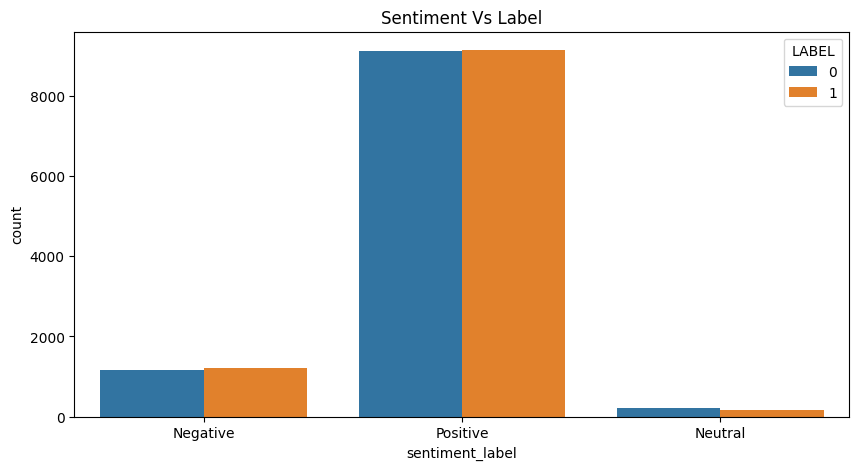

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment_label', hue='LABEL', data=data)
plt.title('Sentiment Vs Label');

**INFERENCE**
Most fake reviews have higher positive and negative sentiment indicating the reviewers either wrote very good things about a product or gave negative feedbacks.

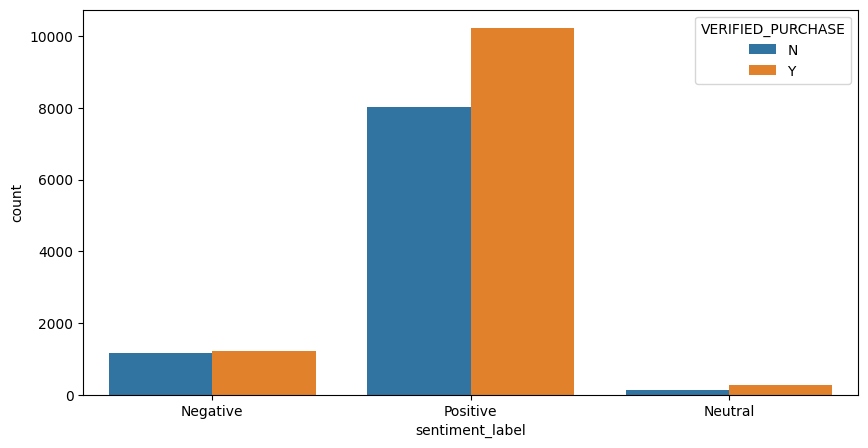

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment_label', hue='VERIFIED_PURCHASE', data=data);

**INFERENCE**
Customers who have purchased the product have mostly have positive sentiment score

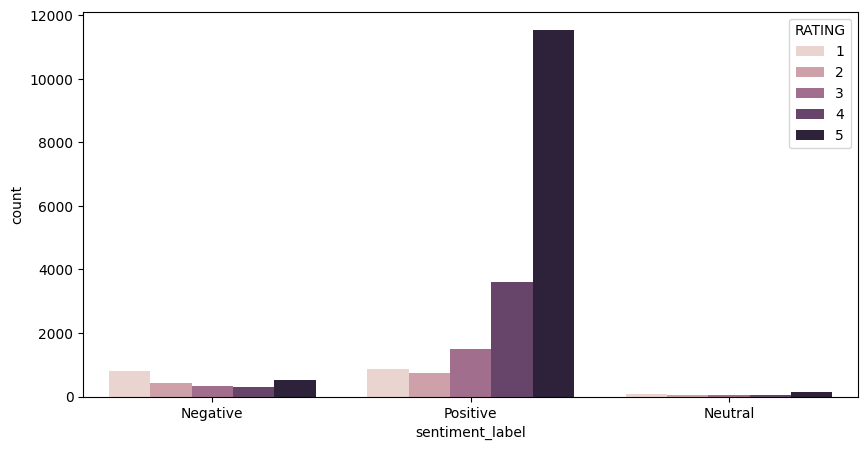

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment_label', hue='RATING', data=data);

**INFERENCE**
Positive sentiment has highest rating as 5

**Checking the length of the reviews**

longer/shorter reviews have been verified?

In [ ]:
data['review_length'] = data['REVIEW_TEXT'].map(len)

In [ ]:
max(data['review_length'])

16188

In [ ]:
min(data['review_length'])

98

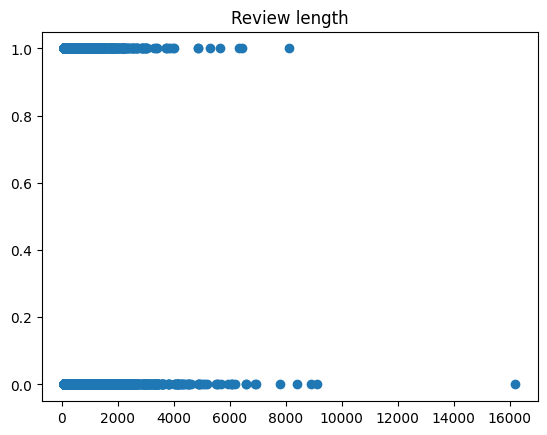

In [ ]:
plt.scatter(x = 'review_length', y = 'LABEL', data=data)
plt.title('Review length');

**INFERENCE**

All fake reviews have length less than 8k words

In [ ]:
length = data.groupby('LABEL')['review_length'].mean()
length.head()

LABEL
0    428.102857
1    316.550000
Name: review_length, dtype: float64

**INFERENCE**

Fake reviews are shorter in length

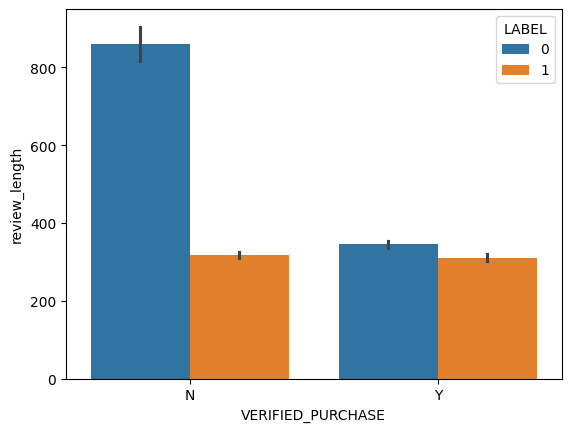

In [ ]:
ax = sns.barplot(x="VERIFIED_PURCHASE", y="review_length", hue="LABEL", data=data)

**INFERENCE**

1. Fake reviews are shorter in length in both cases in regardless of product being purchased or not
2. Real reviews which have not been verified has the highest review length

INFERENCE

Fake reviews with neutral tone have higher review length. Real reviews have highest positive and negative sentiment

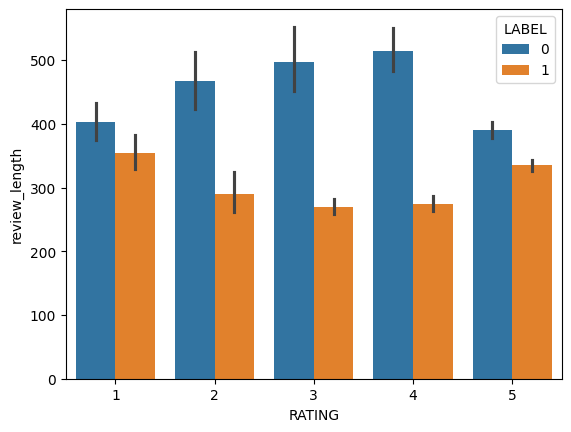

In [ ]:
ax = sns.barplot(x="RATING", y="review_length", hue="LABEL", data=data)

In [ ]:
#albert
#in another file

In [ ]:
#LSTM

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**PREPROCESS TEXT**


*   Remove punctuation, stop words, HTML tags, etc. (optional)
*   Convert text to lowercase.



In [ ]:
def preprocess_text(text):
    text = text.lower()
    # Add further preprocessing steps here as needed
    return text

data["REVIEW_TEXT"] = data["REVIEW_TEXT"].apply(preprocess_text)

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data["LABEL"] = label_encoder.fit_transform(data["LABEL"])

**SPLIT DATA**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["REVIEW_TEXT"], data["LABEL"], test_size=0.2)

**TOKENIZATION**

In [ ]:
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=50)  # Adjust maxlen as needed
X_test_padded = pad_sequences(X_test_sequences, maxlen=50)

In [ ]:
# Ensure that labels in training set cover all possible values
label_encoder = LabelEncoder()
label_encoder.fit(y_train.tolist() + y_test.tolist())

LabelEncoder()

In [ ]:
# Encode labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**MODEL BUILDING**

In [ ]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Complie the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
#Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch_size


Epoch 1/10
525/525 [==============================] - 44s 80ms/step - loss: 0.6512 - accuracy: 0.6115
Epoch 2/10
525/525 [==============================] - 47s 89ms/step - loss: 0.5432 - accuracy: 0.7260
Epoch 3/10
525/525 [==============================] - 48s 91ms/step - loss: 0.4107 - accuracy: 0.8155
Epoch 4/10
525/525 [==============================] - 45s 86ms/step - loss: 0.2948 - accuracy: 0.8764
Epoch 5/10
525/525 [==============================] - 46s 88ms/step - loss: 0.2078 - accuracy: 0.9180
Epoch 6/10
525/525 [==============================] - 35s 66ms/step - loss: 0.1479 - accuracy: 0.9446
Epoch 7/10
525/525 [==============================] - 28s 54ms/step - loss: 0.0936 - accuracy: 0.9671
Epoch 8/10
525/525 [==============================] - 26s 49ms/step - loss: 0.0671 - accuracy: 0.9767
Epoch 9/10
525/525 [==============================] - 26s 50ms/step - loss: 0.0516 - accuracy: 0.9830
Epoch 10/10
525/525 [==============================] - 26s 50ms/step - loss: 0.036

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Accuracy:", accuracy)


132/132 [==============================] - 3s 16ms/step - loss: 2.2221 - accuracy: 0.5971
Accuracy: 0.5971428751945496


In [ ]:
# Predict labels for the test set
y_pred_prob = model.predict(X_test_padded)
y_pred_labels = (y_pred_prob > 0.5).astype(int)


132/132 [==============================] - 2s 11ms/step


In [ ]:
# Convert predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_labels.flatten())

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      2161
           1       0.58      0.62      0.60      2039

    accuracy                           0.60      4200
   macro avg       0.60      0.60      0.60      4200
weighted avg       0.60      0.60      0.60      4200



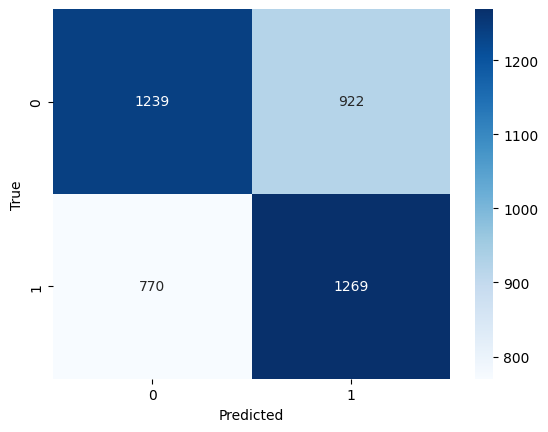

In [ ]:
# Display classification report and confusion matrix
print(classification_report(y_test_encoded, label_encoder.transform(y_pred_labels)))
conf_mat = confusion_matrix(y_test_encoded, label_encoder.transform(y_pred_labels))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#BI LSTM

In [ ]:
!pip install textblob

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from textblob import Word
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import set_config
set_config(print_changed_only=False)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from termcolor import colored # Import the colored function

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", "red"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



LIBRARIES WERE SUCCESFULLY IMPORTED...


In [ ]:
# Loading Data
df = pd.read_csv("/content/amazon_reviews (1).txt", delimiter = "\t")

In [ ]:
# Read the true news
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
print("The shape of df: ", df.shape)

The shape of df:  (21000, 9)


In [ ]:
# Show the information for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
#check the null value
df.isna().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [ ]:
# calculate the duplicate
print("The Number of duplicate :",df.duplicated().sum() )

The Number of duplicate : 0


In [ ]:
# Here we can delet the duplicate
print("Remove The duplicate:",df.drop_duplicates(inplace=True))

Remove The duplicate: None


In [ ]:
# check the value count of the classes we have in the data
print("The count of LABEL: \n", df.LABEL.value_counts())

The count of LABEL: 
 LABEL
__label1__    10500
__label2__    10500
Name: count, dtype: int64


In [ ]:
# Check the value of product_category
print("The value count of PRODUCT_CATEGORY : \n", df.PRODUCT_CATEGORY.value_counts())

The value count of PRODUCT_CATEGORY : 
 PRODUCT_CATEGORY
PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: count, dtype: int64


In [ ]:
# Check the value count for the rating
print("The value count of RATING : \n", df.RATING.value_counts())

The value count of RATING : 
 RATING
5    12210
4     3973
3     1868
1     1757
2     1192
Name: count, dtype: int64


In [ ]:
# Check the value count for the text_
print("The value count of REVIEW_TEXT : \n", df.REVIEW_TEXT.value_counts())

The value count of REVIEW_TEXT : 
 REVIEW_TEXT
When least you think so, this product will save the day. Just keep it around just in case you need it for something.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      1
great bottles. i know its a lot of parts but worth it. you don't have to worry about burping your baby as much because he or she isn't swallowing as much air                                                

In [ ]:
#DATA VISUALIZATION

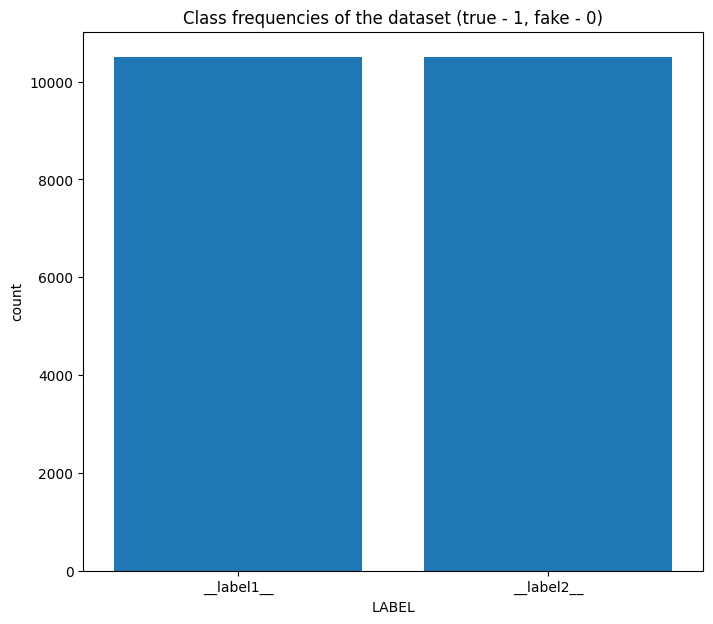

In [ ]:
plt.figure(figsize = [8, 7], clear = True, facecolor = 'white')

sns.barplot(x = df["LABEL"].value_counts().index,
            y = df["LABEL"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

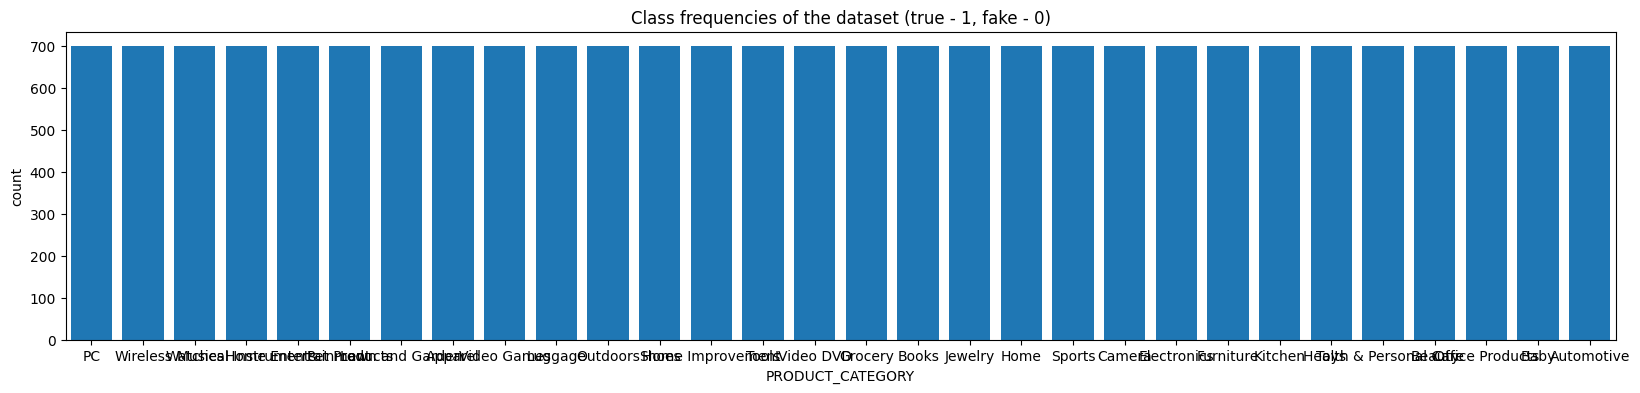

In [ ]:
plt.figure(figsize = [20, 4], clear = False, facecolor = 'white',edgecolor='black')
sns.barplot(x = df["PRODUCT_CATEGORY"].value_counts().index,
            y = df["PRODUCT_CATEGORY"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

In [ ]:
fig = px.pie(data_frame = df, names = "LABEL", hole = 0.4, title = "counts in LABEL",
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [ ]:
fig = px.pie(df, names = "PRODUCT_CATEGORY", title = "counts in LABEL", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [ ]:
pip install wordcloud matplotlib pandas

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
REVIEW_TEXT_combined = ' '.join(df['REVIEW_TEXT'].astype(str).tolist())

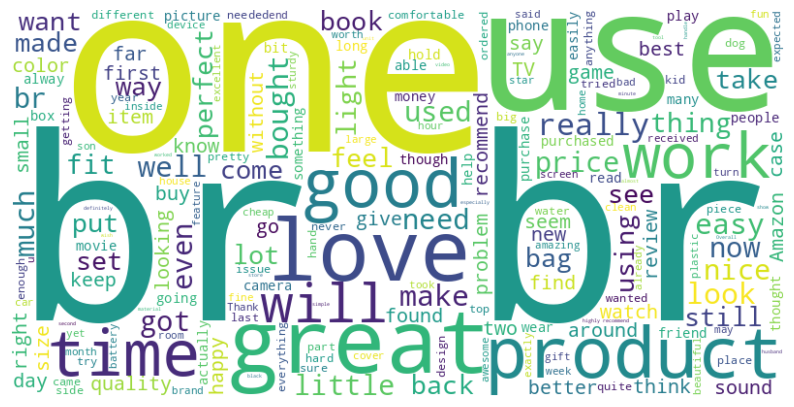

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(REVIEW_TEXT_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#DATA CLEANING

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing th square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['REVIEW_TEXT']=df['REVIEW_TEXT'].apply(denoise_text)

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.REVIEW_TEXT)
corpus[:5]

['least', 'think', 'so,', 'product', 'save']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'like': 5320,
 'one': 5107,
 'great': 4044,
 'would': 4043,
 'really': 3916,
 'good': 3844,
 'use': 3458,
 'get': 3456,
 'it.': 2944,
 'love': 2744}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#CALCULATE THE UNIGRAM ANALYSIS

<Axes: >

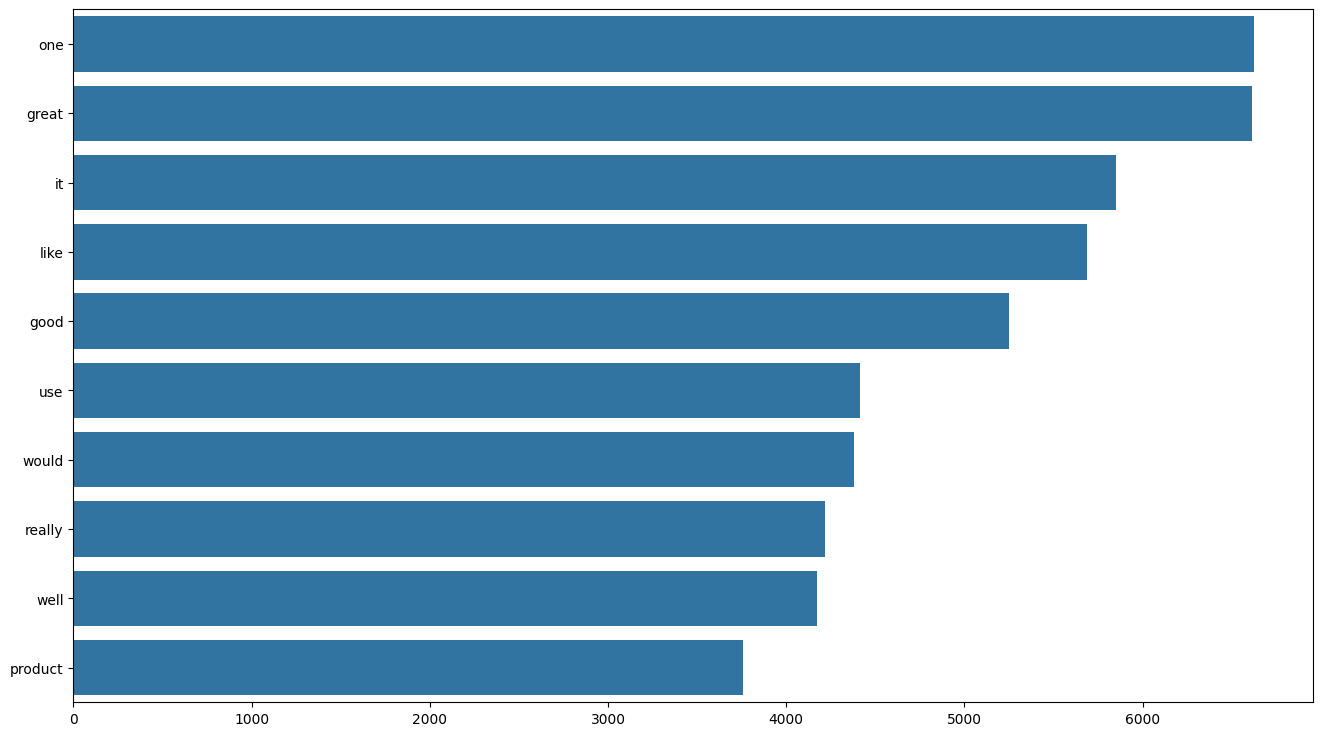

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.REVIEW_TEXT,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [ ]:
#CALCULATE THE BIGRAM ANALYSIS

<Axes: >

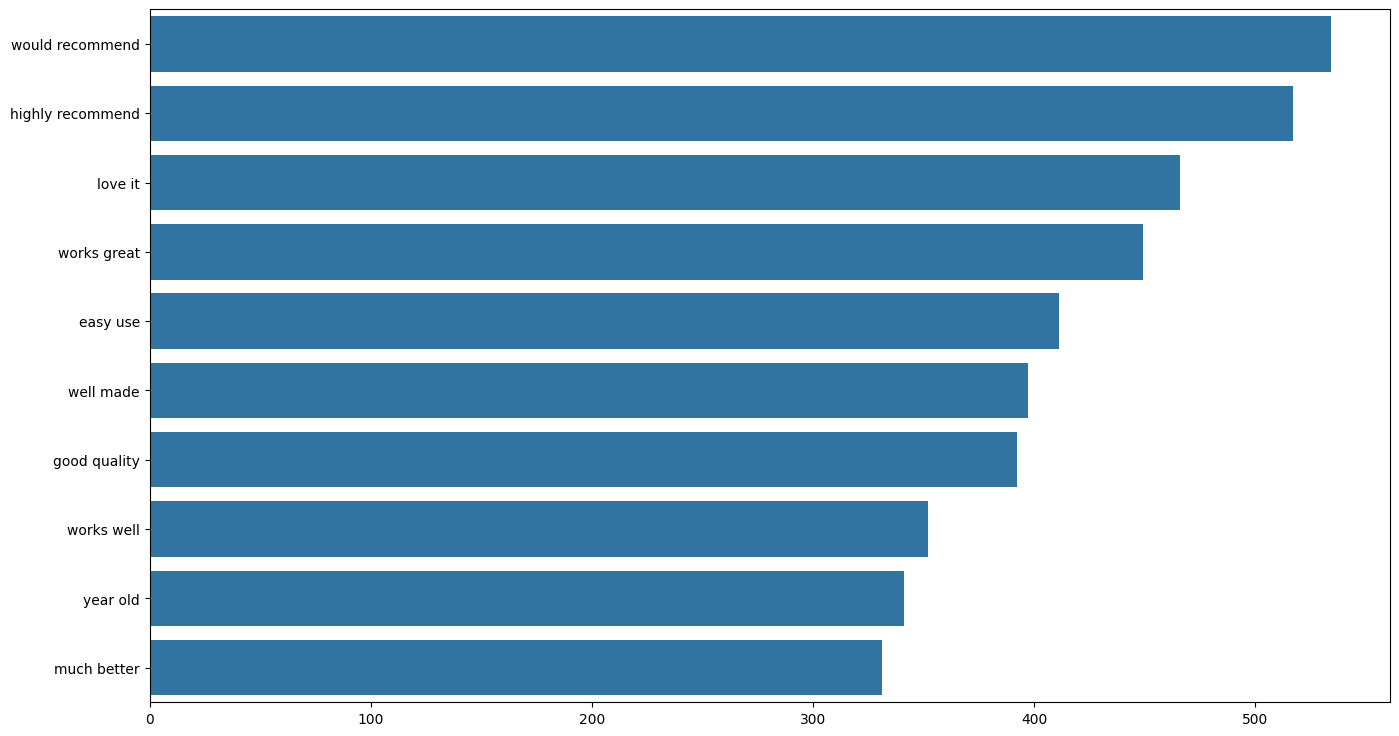

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.REVIEW_TEXT,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

In [ ]:
#look at the latest condition of the dataset
df.head(n = 10).style.background_gradient(cmap = "summer")

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"least think so, product save day. keep around case need something."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Battery for Samsung Galaxy Note 3 [24-Month Warranty] with NFC Chip + Google Wallet Capable,New era for batteries,Lithium batteries something new introduced market average developing cost relatively high Stallion compromise quality provides us best low cost.There many built technical assistants act like sensor particular forté. battery keeps phone charged works every voltage high voltage never risked.
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,"purchased swing baby. 6 months pretty much grown it. loud swing well. beautiful though. love colors lot settings, think worth money."
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,looking inexpensive desk calcolatur is. works everything need. issue tilts slightly one side hit keys rocks little bit. big deal.
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensitivity,Only use twice a week,"use twice week results great. used teeth whitening solutions them, results would use least three times week. keep using potency solution also technique trays, keeps everything teeth, mouth."
5,6,__label1__,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Light Weight - For Single Pipe,not sure,I'm sure supposed would recommend little research culture using pipes plan giving gift using yourself.
6,7,__label1__,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,"Pleased ping pong table. 11 year old 13 year old blast, plus lots family entertainment too. Plus better kids sitting video games day. friend put together. believe challenge, nothing could handle"
7,8,__label1__,4,Y,Beauty,B00QUL8VX6,"Abundant Health 25% Vitamin C Serum with Vitamin E and Hyaluronic Acid for Youthful Looking Skin, 1 fl. oz.",Great vitamin C serum,"Great vitamin C serum... really like oil feeling, sticky. used last week recent bug bites helps heal skin faster normal."
8,9,__label1__,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent Pacs 77-load Tub,wonderful detergent.,"I've used tide pods laundry detergent many years,its great detergent use nice scent leaver cloths smelling fresh."
9,10,__label1__,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Supplement for Men with Fenugreek, Science-Based Formula Delivers Visible Results You Can See and Feel, Full 30-Day Cycle",WARNING: do not waste your money on this,"Everybody wants fall promises. relatively unheard brand, even say non existant company. Look amateur labels products are. ask would trust kind amateur stuff? way! waste money."


In [ ]:
df.tail(n = 10).style.background_gradient(cmap = "summer")

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
20990,20991,__label2__,5,Y,Shoes,B00IAELO9O,"Skechers Womens Career-9 To 5 Flats Shoes,Black,8.5",Amazing,shoes absolutely amazing. comfortable work shoes purchased long time.
20991,20992,__label2__,4,Y,Shoes,B00CY8PQUU,"Luichiny Women's Trend Lee Boot,Black,7 M US",AMAZING BOOTS / GREAT PRICE,"boots AMAZING alternative SW 5050 boot. ordered both, frankly prefer one. quality good price better, another imporatant factor personally calf circum. calfs 12 inches, boots fit better SW 5050 boots, 14 circum.The reason giving boots five stars even jeans boot socks, boots still slightly loose me. really wish narrow calf option 11 12 inch circum. could get fitted look.I highly recommend boots! can't wait wear them! mindful skinny legs slighly loose."
20992,20993,__label2__,1,Y,Shoes,B00AO3EELY,"Saucony Men's Hurricane 15 Running Shoe,White/Black/Green,12.5 M US",It is too white!,"son ordered arrived, instantly hated it. pictures looks quite different actually looks."
20993,20994,__label2__,4,Y,Shoes,B004J2JPDI,"crocs Women's Neria Work Clog,Black,8 M US",Nice Shoe,"shoes fit well. purchased wear work rain. back shoe little lower heal like. However, nice shoe."
20994,20995,__label2__,5,Y,Shoes,B006OYJW8W,"Isotoner Women's Microterry PillowStep Satin Cuff Clog Slippers, Black,7.5/8","These slippers are soft, warm, and very cozy ...","slippers soft, warm, cozy. wear size 8B 7.5/8 size fits perfectly."
20995,20996,__label2__,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5 W US",wide width is great!,"bought work. high arches, use arch support. heels high."
20996,20997,__label2__,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8 US Women's",Love crocs!,Crocs one two brands shoes feet day work! Love cross unisex classic clog!
20997,20998,__label2__,5,Y,Shoes,B000EX8CCQ,"Minnetonka Men's 703 Leather Laced Softsole Moccasin,Brown,10.5 M US",I love moccasins This fit like it was custom made for ...,"love moccasins fit like custom made me.Very soft comfortable. Double leather bottom wear everywhere except walking street side walk, dont want wear down, also inner sole pad. mention comfortable?"
20998,20999,__label2__,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",wish little durable. got caught bolt crossing bunk feeding calves. Ripped big hole problem color part boot. broke boots barefooted rock love them. Got another pair good. need make purple😊
20999,21000,__label2__,4,Y,Shoes,B00A46KTLU,"VIBRAM FIVEFINGERS SPEED XC MENS HIKING SHOES, Black/yellow 44 M EU","Love these shoes, except for the laces","I've looking replacement beloved KSO treks (owned two since found them), also looking water-resistant toe shoe ride rain walk puddles. looked like would work aside initial mistake sizing (advice elsewhere said ran small, one ordered first way big, reordered regular fit), love them. Still miss KSO trek's soft leather feel (especially sole), do. laces pain, come undone sometimes, heel chafed first wear bandaids toughened up, think KSO Trek replacements Vibram reissues (please oh please!)."


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Check if your DataFrame is loaded correctly and not empty
print("Shape of df:", df.shape)
print(df.head())  # Display first few rows of the DataFrame


Shape of df: (21000, 9)
   DOC_ID       LABEL  RATING VERIFIED_PURCHASE PRODUCT_CATEGORY  PRODUCT_ID  \
0       1  __label1__       4                 N               PC  B00008NG7N   
1       2  __label1__       4                 Y         Wireless  B00LH0Y3NM   
2       3  __label1__       3                 N             Baby  B000I5UZ1Q   
3       4  __label1__       4                 N  Office Products  B003822IRA   
4       5  __label1__       4                 N           Beauty  B00PWSAXAM   

                                       PRODUCT_TITLE  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   
3  Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitenin...   

               REVIEW_TITLE                                        REVIEW_TEXT  
0                    useful  least think so, product save day. keep around ..

In [ ]:
# Ensure 'REVIEW_TEXT' and 'LABEL' columns exist in DataFrame
if 'REVIEW_TEXT' not in df.columns:
    print("Column 'REVIEW_TEXT' not found in DataFrame.")
if 'LABEL' not in df.columns:
    print("Column 'LABEL' not found in DataFrame.")

In [ ]:
#PREPARING THE DATASET FOR MODELS

In [ ]:
# Preparing the dataset for models
x = df["REVIEW_TEXT"]
y = df["LABEL"]

In [ ]:
# Map string labels to numeric values
label_mapping = {'CG': 0, 'OR': 1, '…':2}  # Replace '…' with actual labels
df['LABEL'] = df['LABEL'].map(label_mapping)


In [ ]:
# Check if your data is loaded correctly and not empty
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (21000,)
Shape of y: (21000,)


In [ ]:
# Fill missing values with a suitable strategy (e.g., -1)
df['LABEL'] = df['LABEL'].fillna(-1)

In [ ]:
# Now convert to integers
y = df['LABEL'].astype(int)

In [ ]:
# Check if your data is loaded correctly and not empty
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (21000,)
Shape of y: (21000,)


In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, random_state=11)

In [ ]:
print("Shape of the train data: ",x_train.shape)
print("Shape of the test data: ",x_test.shape)

Shape of the train data:  (16800,)
Shape of the test data:  (4200,)


In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(x_train)

tokenized_train = tokenizer.texts_to_sequences(x_train)
tokenized_test = tokenizer.texts_to_sequences(x_test)

train_x = sequence.pad_sequences(tokenized_train, maxlen = 300)
test_x = sequence.pad_sequences(tokenized_test, maxlen = 300)

In [ ]:
# Prepare embedding matrix (assuming you're training embeddings as part of the model)
word_index = tokenizer.word_index
nb_words = min(10000, len(word_index)) + 1  # Adding 1 because of reserved 0 index for padding
embedding_dim = 100  # Example embedding dimension

# Example of initializing embedding matrix with random values
embedding_matrix = np.random.randn(nb_words, embedding_dim)

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)

In [ ]:
#BUILDING THE MODEL

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=nb_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=300,
                    trainable=False))
model.add(Bidirectional(LSTM(150))),

model.add(Dense(units = 32,
                activation = "relu"))
model.add(Dense(1,
                activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000100   
                                                                 
 bidirectional (Bidirection  (None, 300)               301200    
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                9632      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1310965 (5.00 MB)
Trainable params: 310865 (1.19 MB)
Non-trainable params: 1000100 (3.82 MB)
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Learning rate reduction callback
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, min_lr=0.00001)


In [ ]:
history = model.fit(train_x,
                    y_train,
                    batch_size = 128,
                    validation_data = (test_x, y_test),
                    epochs = 5,
                    callbacks = [lr_reduce])

Epoch 1/5
132/132 [==============================] - 377s 3s/step - loss: -25618.9258 - accuracy: 0.0000e+00 - val_loss: -54925.9648 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/5
132/132 [==============================] - 376s 3s/step - loss: -101375.8438 - accuracy: 0.0000e+00 - val_loss: -158523.3438 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/5
132/132 [==============================] - 386s 3s/step - loss: -220255.7344 - accuracy: 0.0000e+00 - val_loss: -256586.7031 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/5
132/132 [==============================] - 386s 3s/step - loss: -296254.3750 - accuracy: 0.0000e+00 - val_loss: -337905.5312 - val_accuracy: 0.0000e+00 - lr: 0.0050
Epoch 5/5
132/132 [==============================] - 379s 3s/step - loss: -376259.6562 - accuracy: 0.0000e+00 - val_loss: -419901.0938 - val_accuracy: 0.0000e+00 - lr: 0.0050


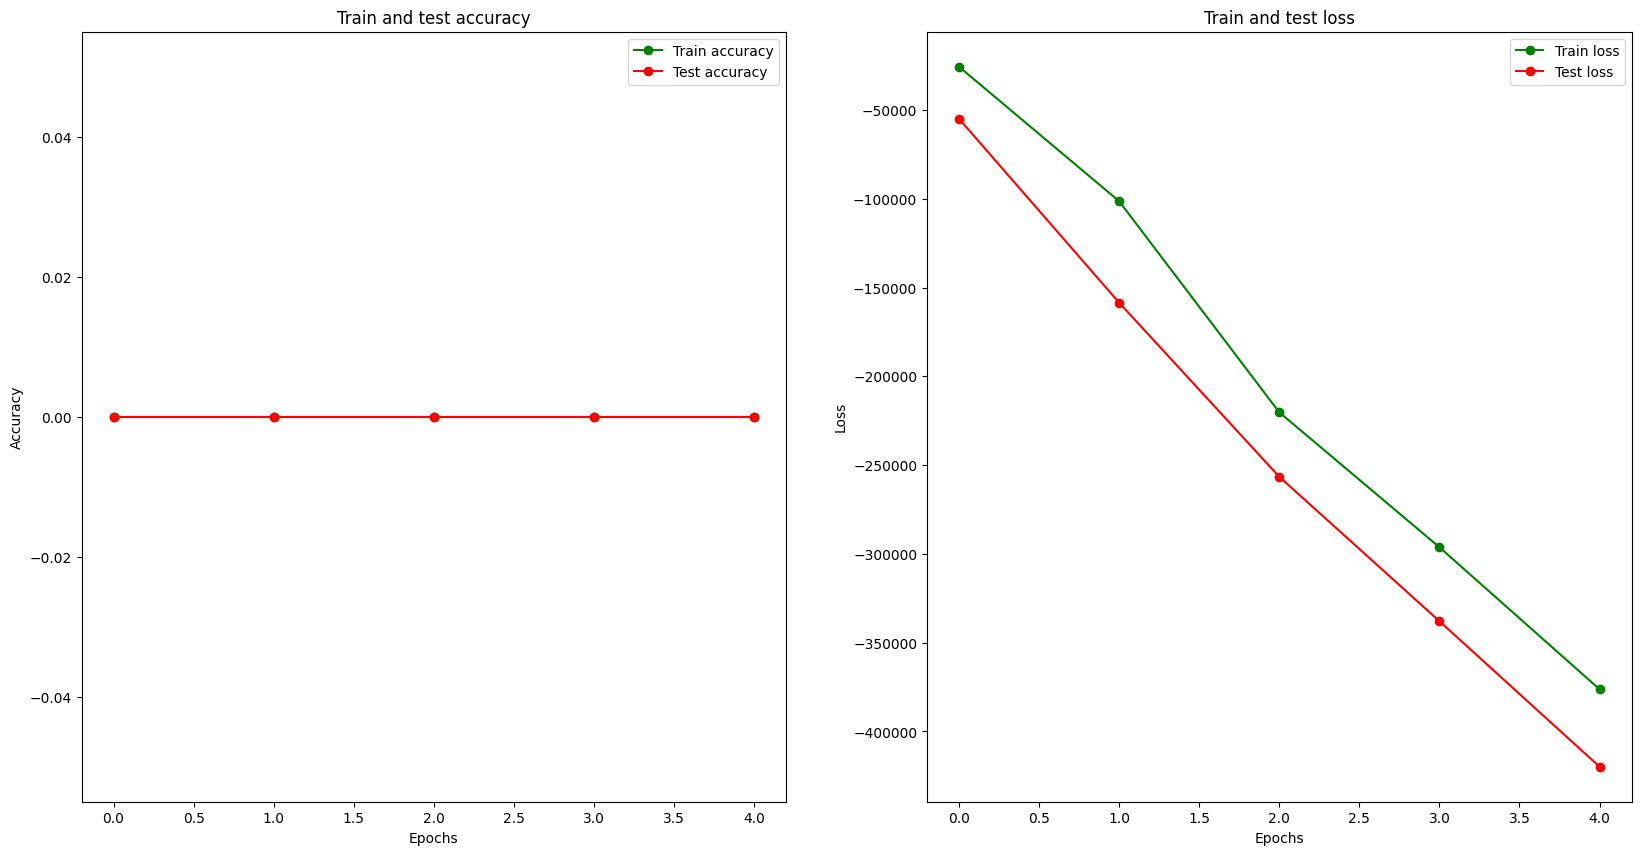

In [ ]:
epochs = [i for i in range(5)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


In [ ]:
# make prediction
predictions = (model.predict(test_x) > 0.5).astype("int32")

132/132 [==============================] - 73s 538ms/step


In [ ]:
# calc the classes pred
classes_pred = np.argmax(predictions, axis = 1)

print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00    4200.0
           0       0.00      0.00      0.00       0.0

    accuracy                           0.00    4200.0
   macro avg       0.00      0.00      0.00    4200.0
weighted avg       0.00      0.00      0.00    4200.0



In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(train_x,y_train)[1]*100 , "%")
print("*********************************************************************************************")
print("Accuracy of the model on Testing Data is - " , model.evaluate(test_x,y_test)[1]*100 , "%")

525/525 [==============================] - 239s 455ms/step - loss: -419812.0000 - accuracy: 0.0000e+00
Accuracy of the model on Training Data is -  0.0 %
*********************************************************************************************
132/132 [==============================] - 55s 420ms/step - loss: -419901.2188 - accuracy: 0.0000e+00
Accuracy of the model on Testing Data is -  0.0 %


In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[   0, 4200],
       [   0,    0]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
#CNN

In [ ]:
# LIBRARIES
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('/content/amazon_reviews (1).txt', sep='\t')

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'theano'  # or 'cntk'


In [ ]:
# REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
# DROP EXTRA COLUMNS
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
else:
    print("'Unnamed: 0' not found in DataFrame")


'Unnamed: 0' not found in DataFrame


In [ ]:
# ASSIGN THE VARIABLES
X = df['REVIEW_TEXT']  # input var
y = df['VERIFIED_PURCHASE']  # target var

In [ ]:
# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    df['REVIEW_TEXT'], df['VERIFIED_PURCHASE'], test_size=0.3, random_state=42)


In [ ]:
# TOKENIZE TEXT
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
# CONVERT TEXT TO SEQUENCES
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# ADD PADDING TO ENSURE CONSISTENT SEQUENCE LENGTH
vocab_size = len(tokenizer.word_index) + 1
max_len = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
# BUILDING THE CNN MODEL
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# COMPILE THE MODEL
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# TRAIN THE MODEL
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5575 - loss: 0.6859 - val_accuracy: 0.5727 - val_loss: 0.6703
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6352 - loss: 0.6398 - val_accuracy: 0.6240 - val_loss: 0.6455
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7855 - loss: 0.4780 - val_accuracy: 0.5886 - val_loss: 0.7135
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9358 - loss: 0.2203 - val_accuracy: 0.5935 - val_loss: 0.9030
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0600 - val_accuracy: 0.6016 - val_loss: 1.1936
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9990 - loss: 0.0148 - val_accuracy: 0.6056 - val_loss: 1.3802
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0060 - val_accuracy: 0.6048 - val_loss: 1.5007
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 0.0044 - val_accuracy: 

In [ ]:
# EVALUATE THE MODEL
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# PREDICT ON TEST DATA
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# PRINT EVALUATION METRICS
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 60.62%
Precision: 63.38%
Recall: 68.87%
F1-Score: 66.01%


In [ ]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1410 1392]
 [1089 2409]]


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.50      0.53      2802
           1       0.63      0.69      0.66      3498

    accuracy                           0.61      6300
   macro avg       0.60      0.60      0.60      6300
weighted avg       0.60      0.61      0.60      6300



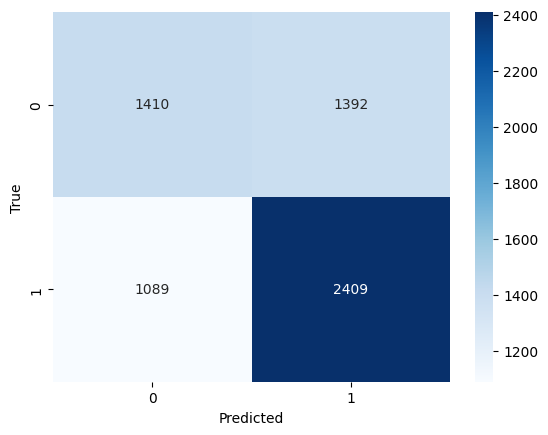

In [ ]:
# Display classification report and confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

#ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [ ]:
df = pd.read_csv("/content/amazon_reviews (1).txt", delimiter = "\t")

In [ ]:
# Adjust column names if needed
X_train, X_test, y_train, y_test = train_test_split(df['REVIEW_TEXT'], df['LABEL'], test_size=0.2, random_state=42)

In [ ]:
# Tokenize and pad the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')


In [ ]:

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Build the ANN model
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=10, validation_data=(X_test_padded, y_test_encoded))


Epoch 1/10
525/525 [==============================] - 215s 406ms/step - loss: 0.6568 - accuracy: 0.6212 - val_loss: 0.6166 - val_accuracy: 0.6510
Epoch 2/10
525/525 [==============================] - 203s 387ms/step - loss: 0.4234 - accuracy: 0.8046 - val_loss: 0.7161 - val_accuracy: 0.6581
Epoch 3/10
525/525 [==============================] - 204s 389ms/step - loss: 0.1321 - accuracy: 0.9563 - val_loss: 1.0328 - val_accuracy: 0.6438
Epoch 4/10
525/525 [==============================] - 206s 393ms/step - loss: 0.0228 - accuracy: 0.9967 - val_loss: 1.2505 - val_accuracy: 0.6407
Epoch 5/10
525/525 [==============================] - 205s 390ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.4257 - val_accuracy: 0.6426
Epoch 6/10
525/525 [==============================] - 205s 391ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.5401 - val_accuracy: 0.6445
Epoch 7/10
525/525 [==============================] - 205s 391ms/step - loss: 7.8309e-04 - accuracy: 1.0000 - val_loss: 1.62

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"Accuracy: {accuracy * 100:.2f}%")

132/132 [==============================] - 8s 64ms/step - loss: 1.8548 - accuracy: 0.6462
Accuracy: 64.62%


132/132 [==============================] - 8s 55ms/step
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2115
           1       0.64      0.64      0.64      2085

    accuracy                           0.65      4200
   macro avg       0.65      0.65      0.65      4200
weighted avg       0.65      0.65      0.65      4200



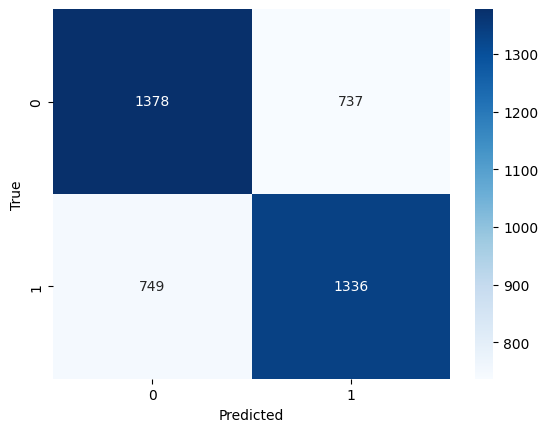

In [ ]:
# Display classification report and confusion matrix
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test_encoded, y_pred))
conf_mat = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#hybrid model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load and preprocess the data
df = pd.read_csv("/content/amazon_reviews (1).txt", sep='\t')
X_train, X_test, y_train, y_test = train_test_split(df['REVIEW_TEXT'], df['VERIFIED_PURCHASE'], test_size=0.3, random_state=42)


In [ ]:

# Tokenize and pad the text data for CNN
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_cnn = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_cnn = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)


In [ ]:

# Tokenize and pad the text data for ANN
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_ann = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_ann = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



In [ ]:
# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(5000, 100, input_length=100))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_encoded, epochs=10, batch_size=64, verbose=0)


In [ ]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Embedding(5000, 100, input_length=100))
ann_model.add(Flatten())
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_ann, y_train_encoded, epochs=10, batch_size=64, verbose=0)


In [ ]:
# Combine predictions from both models
cnn_preds = cnn_model.predict(X_test_cnn)
ann_preds = ann_model.predict(X_test_ann)
hybrid_preds = (cnn_preds + ann_preds) / 2  # You can also try other combination strategies


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Convert probabilities to classes
hybrid_classes = (hybrid_preds > 0.5).astype(int)


In [ ]:
# Evaluate the hybrid model
hybrid_accuracy = accuracy_score(y_test_encoded, hybrid_classes)
print(f"Hybrid Model Accuracy: {hybrid_accuracy * 100:.2f}%")


Hybrid Model Accuracy: 61.16%


In [ ]:
# Display classification report and confusion matrix for the hybrid model
print(classification_report(y_test_encoded, hybrid_classes))
conf_mat = confusion_matrix(y_test_encoded, hybrid_classes)
print("Confusion Matrix:")
print(conf_mat)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53      2802
           1       0.64      0.70      0.67      3498

    accuracy                           0.61      6300
   macro avg       0.60      0.60      0.60      6300
weighted avg       0.61      0.61      0.61      6300

Confusion Matrix:
[[1402 1400]
 [1047 2451]]


              precision    recall  f1-score   support

           0       0.57      0.50      0.53      2802
           1       0.64      0.70      0.67      3498

    accuracy                           0.61      6300
   macro avg       0.60      0.60      0.60      6300
weighted avg       0.61      0.61      0.61      6300

Confusion Matrix:
[[1402 1400]
 [1047 2451]]


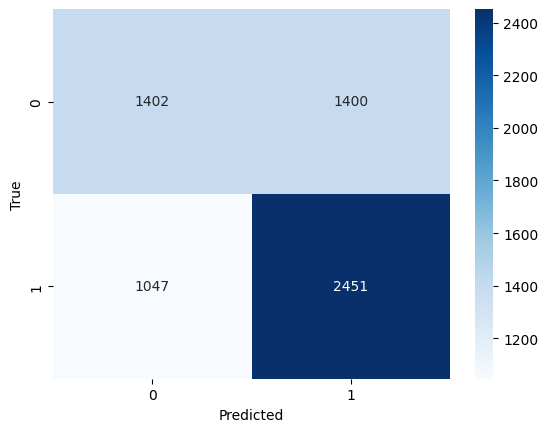

In [ ]:
# Display classification report and confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test_encoded, hybrid_classes))
conf_mat = confusion_matrix(y_test_encoded, hybrid_classes)
print("Confusion Matrix:")
print(conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()